In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy


In [2]:
!pip install openpyxl

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Read Data, i upload the data to my jupyter folder, and read directly within the folder

In [4]:
train_data = pd.read_excel("Data_Train.xlsx")

In [5]:
train_data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


In [6]:
train_data.tail(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [ ]:
# Try to understand the structure of the data set

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
#Firstly check if there are any null value, and fount that Route and Total_Stops column have null value, i then check the row that has null value, and drop the whole row

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
train_data[train_data["Total_Stops"].isnull()]
train_data[train_data["Route"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [11]:
train_data.dropna(inplace = True) #drop the row that has null value within the origin table

In [12]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
# Copy the data for processing

In [13]:
data = train_data.copy()

In [14]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [ ]:
#Defined a custom function to convert time-related columns into proper datetime format for consistent time parsing. Suppressed potential warnings during conversion to avoid unnecessary alerts in the notebook. 
# Applied this function to Date_of_Journey, Dep_Time, and Arrival_Time columns to ensure they are in a uniform datetime format, which allows easier extraction of day, month, hour, and other time features.

In [ ]:
def change_into_dateTime(col):
    data[col] = pd.to_datetime(data[col])

In [16]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [17]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [18]:
for feature in ["Date_of_Journey", "Dep_Time", "Arrival_Time"]:
    change_into_dateTime(feature)

In [19]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [ ]:
# Extracted year, month, and day from the Date_of_Journey column.

In [ ]:
data["Journey_day"] = data["Date_of_Journey"].dt.day
data["Journey_month"] = data["Date_of_Journey"].dt.month
data["Journey_year"] = data["Date_of_Journey"].dt.year

In [21]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-05-21 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-05-21 05:50:00,2025-05-21 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019


In [ ]:
# Extracted hour and minute components from both departure and arrival times using a custom function. 
# Converted datetime fields into separate numerical features (_hour and _minute) to improve model interpretability and help capture time-related patterns affecting flight prices. Dropped the original Arrival_Time and Dep_Time columns to avoid redundancy.

In [23]:
def extract_hour_minute(df, col):
    df[col + "_hour"] = df[col].dt.hour
    df[col + "_minute"]= df[col].dt.minute
    return df.head(3)

In [24]:
extract_hour_minute(data, "Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-05-21 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-05-21 05:50:00,2025-05-21 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-05-21 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25


In [25]:
extract_hour_minute(data, "Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-05-21 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-05-21 05:50:00,2025-05-21 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-05-21 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [26]:
cols_to_drop = ["Arrival_Time","Dep_Time"]
data.drop(cols_to_drop, axis = 1, inplace = True) #axis = 1: drop the column

In [27]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [ ]:
#Grouped departure hours into semantic time blocks (e.g., Early Morning, Noon, Night) to enhance temporal interpretability. Applied a custom mapping function and visualized the distribution using a bar chart

In [29]:
def flight_dep_time(x):
    if(x>4) and (x<=8):
        return "Early Morning"
    elif(x>8) and (x<=12):
        return "Morning"
    elif(x>12) and (x<=16):
        return "Noon"
    elif(x>16) and (x<=20):
        return "Evening"
    elif(x>20) and (x<=24):
        return "Night"
    else:
        return "Late Night"

<Axes: xlabel='Dep_Time_hour'>

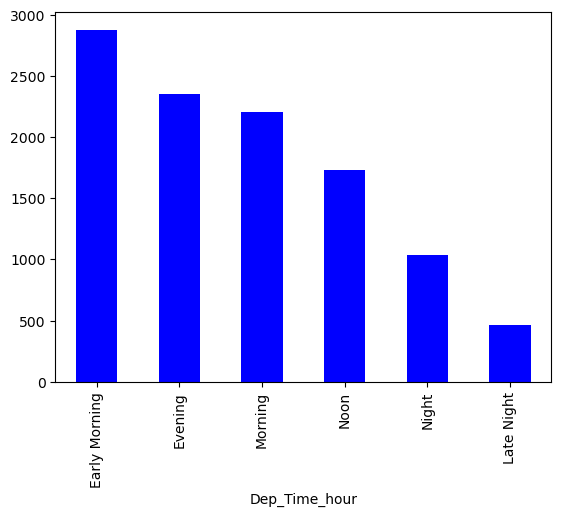

In [ ]:
data["Dep_Time_hour"].apply(flight_dep_time).value_counts().plot(kind="bar", color="b") 

In [ ]:
#Installed and configured Plotly for interactive visualization in Jupyter Notebook. Transformed departure time into semantic time blocks, aggregated flight counts by time category, 
# and plotted the distribution using an interactive bar chart. Enhanced data exploration and presentation with a more intuitive and engaging format.

In [32]:
!pip install plotly
!pip install chart_studio
!pip install cufflinks

In [33]:
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot, iplot, init_notebook_mode, download_plotlyjs
init_notebook_mode(connected = True)
cf.go_offline()


In [ ]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe_connected'
dep_time_counts = data["Dep_Time_hour"].apply(flight_dep_time).value_counts()
dep_time_counts_df = dep_time_counts.reset_index()
dep_time_counts_df.columns = ['Dep_Time_hour', 'Counts']
fig = px.bar(
    dep_time_counts_df,
    x='Dep_Time_hour',
    y='Counts',
    title='Flight Departure Time Counts'
)
fig.show()

In [ ]:
# Standardized the flight Duration field by ensuring consistent hour-minute format (xh ym). Applied string parsing to extract numeric values for duration hours and minutes, creating two separate features. 

In [ ]:
def preprocess_duration(x):
    if "h" not in x:
        x = "0h" + " " + x
    elif "m" not in x:
        x = x + " " + "0m"
    return x

In [37]:
data["Duration"] = data["Duration"].apply(preprocess_duration)

In [38]:
data["Duration"]

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [ ]:
data["Duration_hour"] = data["Duration"].apply(lambda x : int(x.split(' ')[0][0:-1]))
data["Duration_minute"] = data["Duration"].apply(lambda x : int(x.split(' ')[1][0:-1]))

In [40]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,2019,19,55,22,25,2,30
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,2019,20,45,23,20,2,35
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,3h 0m,non-stop,No info,7229,27,4,2019,8,20,11,20,3,0
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,2019,11,30,14,10,2,40
10682,Air India,2019-05-09,Delhi,Cochin,DEL → GOI → BOM → COK,8h 20m,2 stops,No info,11753,9,5,2019,10,55,19,15,8,20


In [ ]:
# Converted the Duration string into a mathematical expression to calculate total travel time in minutes, resulting in a new numerical feature Duration_total_minute. Used scatter and regression plots to analyze the relationship between duration and price. 
# The visualization shows that non-stop flights are shorter and often cheaper. As the number of stops increases, both duration and price variability increase. According to the regression line, flight prices tend to rise with longer durations.

In [ ]:
data["Duration_total_minute"] = data["Duration"].str.replace('h',"*60").str.replace(' ', '+').str.replace('m','*1').apply(eval)

<Axes: xlabel='Duration_total_minute', ylabel='Price'>

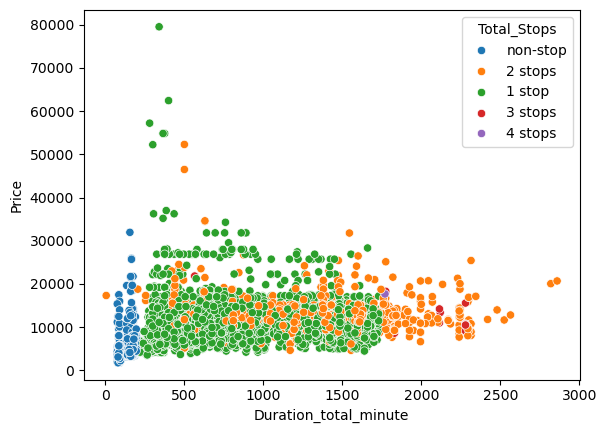

In [42]:
sns.scatterplot(x="Duration_total_minute", y= "Price", hue="Total_Stops", data = data)

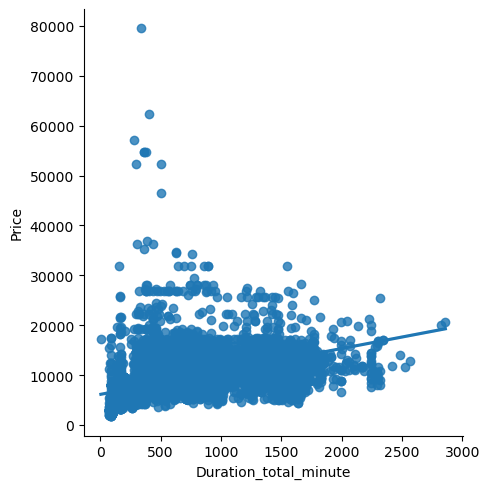

In [ ]:
sns.lmplot(x="Duration_total_minute", y= "Price", data = data)

In [ ]:
#Examined the frequency of routes operated by Jet Airways to see if the airline mainly serves long-distance or high-demand routes that could justify the higher costs. Then used a boxplot to compare ticket price distributions across all airlines. 
#The visualization confirmed that Jet Airways Business offers the most expensive fares, suggesting that both route selection and service level contribute to its pricing strategy.

In [ ]:
data[data["Airline"] == "Jet Airways"].groupby("Route").size().sort_values(ascending = False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

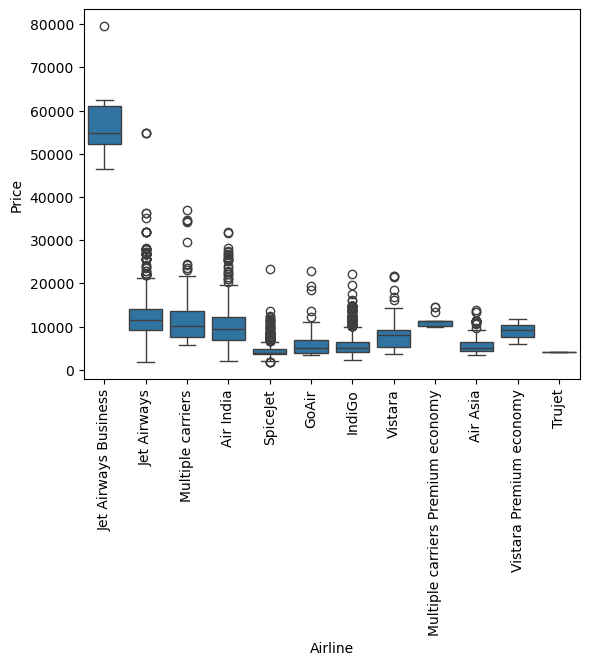

In [ ]:
sns.boxplot(y="Price", x="Airline", data = data.sort_values("Price", ascending = False))
plt.xticks(rotation = "vertical")
plt.show()

In [46]:
# Since the number of unique values in 'Source' is small, i will manually apply One-Hot Encoding using a for loop and lambda expression.
#Convert categorical text values in 'Source' column into numerical format using one-hot encoding, because machine learning models require numerical input and cannot interpret text labels directly.
#Identify all unique categories in 'Source', create a new binary column for each category using the pattern 'Source_<category>', assign 1 if the row matches the category, otherwise 0.
[col for col in data.columns if data[col].dtype == "object"]

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [47]:
data["Source"].unique() #Get unique categories from the 'Source' column

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [48]:
for category in data["Source"].unique():
    #For each unique category like 'Delhi', 'Mumbai',create a new column named 'Source_<category>', Each row will get 1 if it matches the category, otherwise 0
    data["Source_" + category] = data["Source"].apply(lambda x : 1 if x == category else 0)

In [49]:
data.tail(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Duration_total_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,3h 0m,non-stop,No info,7229,27,...,11,20,3,0,180,1,0,0,0,0
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,...,14,10,2,40,160,1,0,0,0,0
10682,Air India,2019-05-09,Delhi,Cochin,DEL → GOI → BOM → COK,8h 20m,2 stops,No info,11753,9,...,19,15,8,20,500,0,0,1,0,0


In [50]:
# apply target guide encoding on Airline to provide the model with a numeric representation that reflects the airline's influence on ticket price.
#i will calculate average ticket price per airline, sorted by price in ascending order, assigned numerical labels starting from 0, 
#replaced airline names using .map().

In [51]:
data['Airline'].unique()
airlines = data.groupby(["Airline"])["Price"].mean().sort_values().index

In [52]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [53]:
airlines_dict = {key:index for index, key in enumerate(airlines, 0)}

In [54]:
# check the index of each row in Airline from airlines_dict, and replace Airline value as index
data["Airline"] = data["Airline"].map(airlines_dict)

In [55]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Duration_total_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0


In [56]:
#Replaced "New Delhi" with "Delhi" to unify destination names. Calculated the average ticket price for each destination, 
#sorted them in ascending order, and assigned numerical labels using target-guided encoding. 
#Replaced the original destination names with these encoded values to help the model capture the relationship between destination and price.

In [ ]:
data["Destination"].replace("New Delhi", "Delhi", inplace = True)
data["Destination"].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [58]:
dest = data.groupby(["Destination"])["Price"].mean().sort_values().index

In [59]:
# from smallest average to hightest average of price
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [60]:
dest_dict = {key:index for index, key in enumerate(dest, 0)}

In [61]:
dest_dict

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [62]:
data["Destination"] = data["Destination"].map(dest_dict)
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Duration_total_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0


In [ ]:
#Apply lebel encoding manually to Total_Stop, because the categories have a clear ordinal relationship:
#4 stops > 3 stops > 2 stops > 1 stop > non-stop. Since the number of stops is ordered and directly related to flight duration and ticket price, label encoding is appropriate as it preserves this order using numeric values (e.g., 0, 1, 2, 3, 4). 
# This allows the model to recognize and learn from the increasing trend

In [64]:
data["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [65]:
stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
data["Total_Stops"] = data["Total_Stops"].map(stop)

In [66]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Duration_total_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0


In [67]:
# Drop column that are not necessary
#Date_of_Journey: year, month, and day have already been extracted
#Source: one-hot encoded into new columns
#Additional_Info: mostly "No Info", not useful for prediction
#Duration_total_minute and Duration: already split into hour and minute columns
#Journey_year: all values are 2019, no variance
#Route: gives the same information as Total_Stops

In [68]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hour',
       'Duration_minute', 'Duration_total_minute', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [69]:
data.drop(columns = ["Date_of_Journey","Source","Additional_Info","Duration_total_minute","Journey_year","Route","Duration"], axis=1, inplace=True)

In [70]:
data.head(3)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882,9,6,9,25,4,25,19,0,0,0,1,0,0


In [71]:
#Handle Outliers in data: To handle outliers in the "Price" column, 
#I first visualized the data using distribution and box plots to detect any extreme values. 
#Then, I used the IQR (Interquartile Range) method to calculate the upper and lower bounds for identifying outliers. 
#I counted how many prices fell outside this range, and decided to treat values greater than 35,000 as outliers. 
#These extreme values were replaced with the median price to reduce their impact on the model. 
#Finally, I re-plotted the data to confirm that the distribution became more consistent and the outliers were properly handled.

In [ ]:
def plot(df, col):
    fig, (ax1,ax2,ax3)=plt.subplots(3,1) 
    sns.kdeplot(df[col],ax=ax1) 
    sns.boxplot(x=df[col],ax=ax2)
    sns.histplot(df[col],ax=ax3, kde=False)

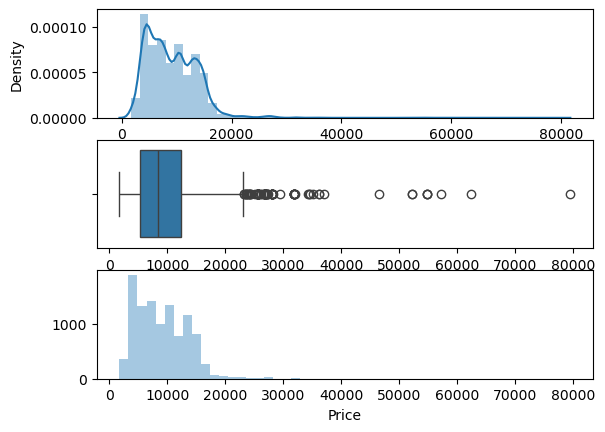

In [73]:
plot(data, "Price")

In [74]:
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)
iqr = Q3 - Q1
maximum = Q3 + 1.5 * iqr
minimum = Q1 - 1.5 * iqr

In [75]:
print(maximum)

23017.0


In [76]:
print(minimum)

-5367.0


In [77]:
print([price for price in data["Price"] if price > maximum or price < minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [78]:
len([price for price in data["Price"] if price > maximum or price < minimum])

94

In [79]:
# most of the outlier are between 23000~32000, which are still reasonable, and there are no outlier that below minimum, so i replace the price that are above 35000 with the median of price 
data["Price"] = np.where(data["Price"] > 35000, data["Price"].median(), data["Price"])

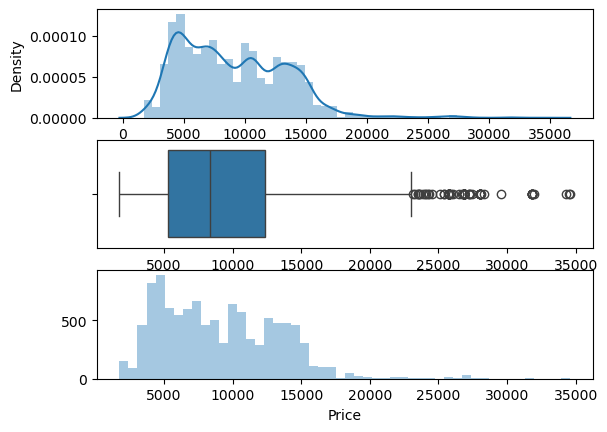

In [80]:
plot(data, "Price")

In [81]:
#To improve model performance and reduce dimensionality, I aim to identify the most relevant features that influence the target variable Price.
#I used mutual_info_regression from sklearn.feature_selection to calculate the mutual information between each feature in X and the target y. 
#This helps me rank features based on how much they contribute to predicting the ticket price, 
#allowing me to select only the most informative ones for training the machine learning model.

In [82]:
x = data.drop(["Price"], axis=1)

In [83]:
y = data["Price"]

In [84]:
from sklearn.feature_selection import mutual_info_regression

In [85]:
imp = mutual_info_regression(x,y) #this will calculate if features relates to target value, and determine if they are independent

In [86]:
imp

array([1.31722104, 1.05927003, 0.78895788, 0.36871608, 0.62645998,
       0.92345878, 0.75954699, 1.13834816, 0.89787936, 1.12723073,
       0.67840149, 0.38840263, 0.46258163, 0.52509113, 0.12946029,
       0.20670354])

In [87]:
imp_df = pd.DataFrame(imp , index=x.columns) #the higher the value, the stroger relationship between target value and features

In [88]:
imp_df.columns = ["importance"]

In [89]:
imp_df

,importance
Airline,1.317221
Destination,1.059270
Total_Stops,0.788958
Journey_day,0.368716
Journey_month,0.626460
Dep_Time_hour,0.923459
Dep_Time_minute,0.759547
Arrival_Time_hour,1.138348
Arrival_Time_minute,0.897879
Duration_hour,1.127231


In [90]:
imp_df.sort_values(by="importance", ascending = False)

,importance
Airline,1.317221
Arrival_Time_hour,1.138348
Duration_hour,1.127231
Destination,1.059270
Dep_Time_hour,0.923459
Arrival_Time_minute,0.897879
Total_Stops,0.788958
Dep_Time_minute,0.759547
Duration_minute,0.678401
Journey_month,0.626460


In [91]:
# Training and evaluating a machine learning model
#I first split the dataset into training and testing sets using train_test_split, with 75% of the data used for training and 25% for testing. Then, I created a RandomForestRegressor model and trained it using the training features (x_train) 
#and target values (y_train).
#After the model was trained, I used it to predict ticket prices on the test set (x_test) and stored the predicted values in y_pred
#Finally, I evaluated the model's performance using the R² score (metrics.r2_score), which measures how well the predictions match the actual ticket prices (y_test).
#After training the model, I used the pickle.dump() function to serialize and store it in a file named rf_random.pkl in the current Jupyter working directory

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [94]:
from sklearn.ensemble import RandomForestRegressor

In [95]:
ml_model = RandomForestRegressor()

In [96]:
ml_model.fit(x_train, y_train)

RandomForestRegressor()

In [97]:
y_pred = ml_model.predict(x_test)

In [98]:
y_pred

array([16865.27,  5279.94,  8728.74, ...,  3508.79,  6246.13,  6885.57])

In [99]:
from sklearn import metrics

In [100]:
metrics.r2_score(y_test, y_pred)

0.810995968324616

In [101]:
import pickle

In [102]:
file = open("rf_random.pkl","wb")

In [103]:
pickle.dump(ml_model, file)

In [104]:
#test if the model can be used
model = open("rf_random.pkl", "rb")

In [105]:
forest = pickle.load(model)

In [106]:
y_pred2 = forest.predict(x_test)

In [107]:
metrics.r2_score(y_test, y_pred2)

0.810995968324616

In [ ]:
#I plan to define two functions to streamline the evaluation process for different regression models. 
#First, I will create a custom mape() function to calculate the Mean Absolute Percentage Error, 
#which will give me a clear idea of how far off the model predictions are from the actual values in percentage terms. 
#Then, I will define a predict(ml_model) function that takes a regression model as input, trains it using the training data (x_train, y_train), 
#and evaluates its performance on the test data (x_test, y_test).

#Inside the predict function, I will use model.fit() and model.predict() to train and make predictions, 
#and then use various metrics from sklearn.metrics such as r2_score, mean_absolute_error, mean_squared_error, 
#and RMSE (by taking the square root of MSE) to assess model accuracy. I will also include the MAPE metric, 
#and finally use a Seaborn plot to visualize the distribution of prediction errors. 
#This setup will help me compare models like RandomForestRegressor and DecisionTreeRegressor using a consistent and automated approach.

In [108]:
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [109]:
from sklearn import metrics

In [119]:
def predict(ml_model):
    model = ml_model.fit(x_train, y_train)
    print("Training score: {}".format(model.score(x_train, y_train)))
    y_prediction = model.predict(x_test)
    print("predictions are:{}".format(y_prediction))
    print("\n")
    r2_score = metrics.r2_score(y_test , y_prediction)
    print("r2 Score:{}".format(r2_score)) #R² = 1 means perfect prediction; R² = 0 means the model predicts no better than the mean
    print("MAE:{}".format(metrics.mean_absolute_error(y_test, y_prediction))) #It tells us on average how much the predictions are off
    print("MSE:{}".format(metrics.mean_squared_error(y_test, y_prediction))) #The average of squared differences between predictions and actual values
    print("RMSE:{}".format(np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))) #Gives error in the same unit as the target variable.
    print("MAPE:{}".format(mape(y_test, y_prediction))) #Shows how far off the predictions are, on average, in percentage terms
    sns.distplot(y_test - y_prediction)

Training score: 0.9518403345772625
predictions are:[16694.45  5440.79  8811.17 ...  3476.23  6194.01  6835.93]


r2 Score:0.8131915443736962
MAE:1171.9807175827104
MSE:3636712.2282501524
RMSE:1907.0165778645326
MAPE:13.16829949240614


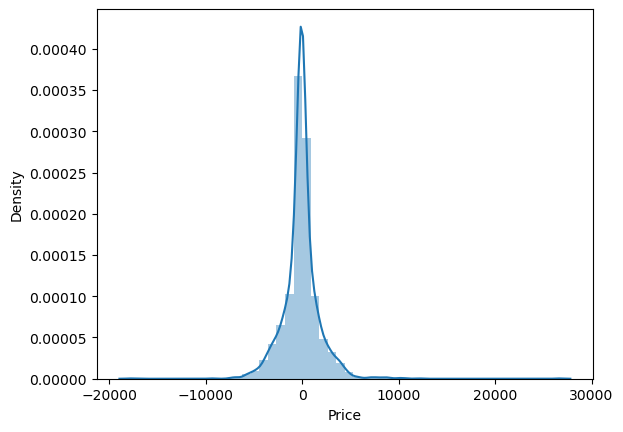

In [120]:
predict(RandomForestRegressor())

Training score: 0.966591628243878
predictions are:[16840.  4959.  8610. ...  3419.  5797.  6442.]


r2 Score:0.6784951836899475
MAE:1408.8001372769252
MSE:6258927.054431757
RMSE:2501.784773802846
MAPE:15.552306906745192


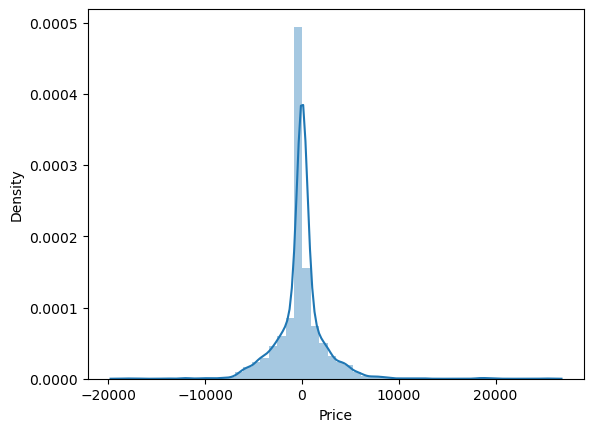

In [121]:
from sklearn.tree import DecisionTreeRegressor
predict(DecisionTreeRegressor())

In [122]:
#Since I’m not sure which hyperparameters will give the best performance,
#I will use RandomizedSearchCV to explore different combinations automatically. 
#I’ll define a search space for key parameters like the number of estimators, maximum depth, 
#and the number of features considered at each split. By using 3-fold cross-validation, 
#I can ensure the results are stable and not overly dependent on a particular split of the data. Once the search is complete, 
#I’ll use the best parameters to build the final model and evaluate its performance.

In [166]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [196]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=6)]

max_features = ["auto", "sqrt"]

max_depth = [int(x) for x in np.linspace(5, 30, num=4)]

min_samples_split = [5, 10, 15, 100]

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split
}

In [202]:
reg_rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(
    random_state=42,
    estimator=reg_rf,
    param_distributions=random_grid,
    cv=3,              
    n_jobs=-1,        
    verbose=2          
)

In [203]:
rf_random.fit(x_train, y_train)  

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   random_state=42, verbose=2)

In [204]:
rf_random.best_params_      

{'n_estimators': 980,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 13}

In [205]:
rf_random.best_estimator_  

RandomForestRegressor(max_depth=13, max_features='sqrt', min_samples_split=5,
                      n_estimators=980)

In [206]:
rf_random.best_score_       

0.8045359875075344

In [ ]:
#After using RandomizedSearchCV with a predefined parameter grid including ranges for n_estimators, 
#max_features, max_depth, and min_samples_split, 
#I found that the cross-validation performance was not significantly better than the default RandomForestRegressor settings. 

In [ ]:
#To improve upon this, I manually tested several high-performing parameter combinations based on intuition and model behavior. 
#Among these, the best result came from using 760 estimators, max_features=None, max_depth=30, and min_samples_split=5. 
#This configuration achieved a test R² score of 0.8219

In [190]:
param_list = [
    {'n_estimators': 980, 'max_features': 'sqrt', 'max_depth': 30, 'min_samples_split': 5},
    {'n_estimators': 1200, 'max_features': 'sqrt', 'max_depth': 30, 'min_samples_split': 5},
    {'n_estimators': 980, 'max_features': None, 'max_depth': 30, 'min_samples_split': 5},
    {'n_estimators': 760, 'max_features': None, 'max_depth': 30, 'min_samples_split': 5},
    {'n_estimators': 980, 'max_features': 'sqrt', 'max_depth': 21, 'min_samples_split': 5},
]

In [211]:
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

for i, params in enumerate(param_list):
    model = RandomForestRegressor(
        n_estimators=params['n_estimators'],
        max_features=params['max_features'],
        max_depth=params['max_depth'],
        min_samples_split=params['min_samples_split'],
        random_state=42,
        n_jobs=-1
    )
    
    model.fit(x_train, y_train)
    score = model.score(x_train, y_train) 
    val_score = model.score(x_test, y_test)
    print(f"Model {i+1} → {params}")
    print(f"  Train R²: {score:.4f} | Test R²: {val_score:.4f}\n")

Model 1 → {'n_estimators': 980, 'max_features': 'sqrt', 'max_depth': 30, 'min_samples_split': 5}
  Train R²: 0.9224 | Test R²: 0.8211

Model 2 → {'n_estimators': 1200, 'max_features': 'sqrt', 'max_depth': 30, 'min_samples_split': 5}
  Train R²: 0.9223 | Test R²: 0.8208

Model 3 → {'n_estimators': 980, 'max_features': None, 'max_depth': 30, 'min_samples_split': 5}
  Train R²: 0.9366 | Test R²: 0.8218

Model 4 → {'n_estimators': 760, 'max_features': None, 'max_depth': 30, 'min_samples_split': 5}
  Train R²: 0.9365 | Test R²: 0.8219

Model 5 → {'n_estimators': 980, 'max_features': 'sqrt', 'max_depth': 21, 'min_samples_split': 5}
  Train R²: 0.9219 | Test R²: 0.8212

